In [1]:
import qiskit as q
%matplotlib inline

## Key ideas
* we use a classical computer to represent a quantum circuit to the quantum computer, the quantum computer runs some cycles on this circuit, and then reports back to us again with a classical bit response(measurement)
* Modeling is the most near-term real-world example that quantum computers are more useful than classical computers.
* A quantum computer can model many molecules already today reliably, and it only gets better from here seemingly.
* Classical computers can approximate and synthesize probability, they are not truly accurate and can never be with most tasks that use probability, Quantum computers do not model probability. They simply are the probability.
* Today's quantum computers are not perfect, they come with some quantum noise during run. Only prefect quantum computers comes in simulations.

In [3]:
#Build a "hello-world" type quantum circuit

circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
#qubit: (0,0)
circuit.x(0) # "x" is a "not" gate.
#qubit: (1,0)
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
#qubit: (1,1)
circuit.measure([0,1], [0,1]) #qubit 0 -> bit 0, qubit 1 -> bit 1 during measurement
#bit: (1,1)

In [4]:
circuit.draw() # text-based visualization

┌───┐     ┌─┐   
q_0: |0>┤ X ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

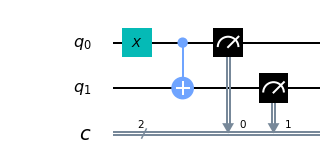

In [5]:
circuit.draw(output="mpl") # matplotlib-based visualization

In [6]:
# Run the quantum circuit we built on the cloud-based quantum computer-IBM
from qiskit import IBMQ
IBMQ.save_account(open("token.txt","r").read())
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
provider = IBMQ.get_provider("ibm-q")
# check current job availabilities on the backends
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "can do simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 0 queued and can do simulated qubits
ibmqx2 has 1 queued and 5 qubits
ibmq_16_melbourne has 3 queued and 15 qubits
ibmq_vigo has 9 queued and 5 qubits
ibmq_ourense has 1 queued and 5 qubits
ibmq_london has 2 queued and 5 qubits
ibmq_burlington has 1 queued and 5 qubits
ibmq_essex has 1 queued and 5 qubits
ibmq_armonk has 1 queued and 1 qubits


In [8]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_essex") # choose a short line from above but make sure the qubits contained is 
# enough for your task
job = q.execute(circuit, backend=backend, shots=500) # 500 shots to see the actual distribution of outcomes.
job_monitor(job)

Job Status: job has successfully run


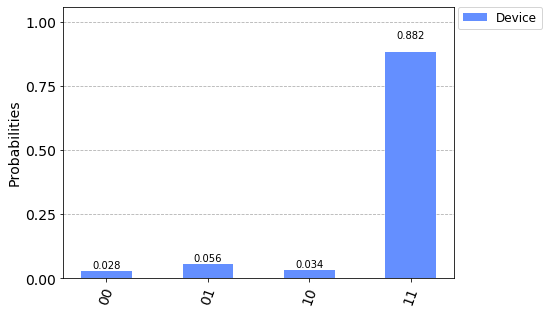

In [9]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])
# the intended answer was indeed a 11, the rests are quantum noises. This is why we perform many "shots."

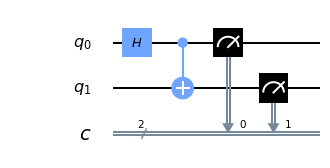

In [11]:
# try another less trivial circuit

circuit = q.QuantumCircuit(2,2) 
# (0,0)
circuit.h(0) # Hadamard gate, puts qubit 0 into superposition of 0 and 1
# (0,0)/sqrt(2) + (1,0)/sqrt(2)
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
# (0,0)/sqrt(2) + (1,1)/sqrt(2)
circuit.measure([0,1], [0,1])
# should get 00 and 11 half the time
circuit.draw(output="mpl")

In [13]:
backend = provider.get_backend("ibmqx2") # after rechecking the availability
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


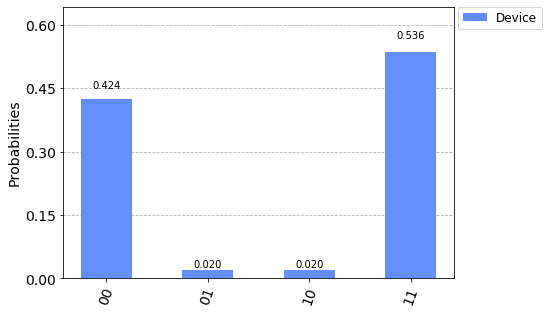

In [14]:
# plot the result run by quantum computer
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])
# we see indeed most of them is 00 and 11, the rests are again quantum noises

In [15]:
# for the rest we do R&D locally(rather than using an actual backend, we use a quantum simulator.) and test on 
# real quantum computer later on

from qiskit import Aer  # simulator framework from qiskit
for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [16]:
sim_backend = Aer.get_backend('qasm_simulator')
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


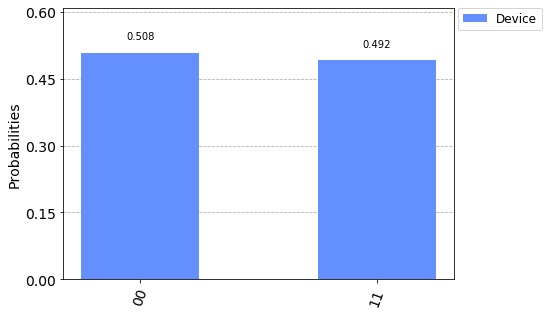

In [19]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])
# the "simulator" simulates a perfect quantum machine. 
# probability 50/50 doesn't necessarily mean the counts are 50/50.
# we can improve this by increasing the number of shots